# Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
a. Import the necessary packages
b. Load the training and testing data 
c. Define the network architecture using Keras 
d. Train the model using SGD with 11 epochs
e. Evaluate the network  
f. Plot the training loss and accuracy

# a. Import the necessary packages

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
from tensorflow.keras.layers import Dense

In [48]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

# b. Load the training and testing data 

In [15]:
((x_train, y_train), (x_test, y_test)) = mnist.load_data("mnist.npz")

In [16]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [17]:
print(y_train)

[5 0 4 ... 5 6 8]


In [18]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [19]:
print(y_test)

[7 2 1 ... 4 5 6]


In [20]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28*28*1)

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
x_test = x_test.reshape(x_test.shape[0], 28*28*1)

In [26]:
x_train.shape

(60000, 784)

In [27]:
x_test.shape

(10000, 784)

In [28]:
x_train = x_train.astype("float32")/255.0

In [29]:
x_test = x_test.astype("float32")/255.0

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [32]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

# c. Define the network architecture using Keras 

In [34]:
model = Sequential()

In [35]:
model.add(Dense(64, input_shape=(784, ), activation='relu'))

In [36]:
model.add(Dense(32, activation='relu'))

In [37]:
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


# d. Train the model using SGD with 11 epochs 

In [42]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['Accuracy'])

In [43]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11, batch_size=100)

Epoch 1/11
600/600 [==============================] - 2s 3ms/step - loss: 1.2986 - Accuracy: 0.6378 - val_loss: 0.6201 - val_Accuracy: 0.8366
Epoch 2/11
600/600 [==============================] - 1s 2ms/step - loss: 0.5074 - Accuracy: 0.8605 - val_loss: 0.4109 - val_Accuracy: 0.8842
Epoch 3/11
600/600 [==============================] - 1s 2ms/step - loss: 0.3883 - Accuracy: 0.8906 - val_loss: 0.3412 - val_Accuracy: 0.9035
Epoch 4/11
600/600 [==============================] - 1s 2ms/step - loss: 0.3379 - Accuracy: 0.9043 - val_loss: 0.3058 - val_Accuracy: 0.9121
Epoch 5/11
600/600 [==============================] - 1s 2ms/step - loss: 0.3075 - Accuracy: 0.9123 - val_loss: 0.2857 - val_Accuracy: 0.9197
Epoch 6/11
600/600 [==============================] - 1s 2ms/step - loss: 0.2858 - Accuracy: 0.9180 - val_loss: 0.2697 - val_Accuracy: 0.9216
Epoch 7/11
600/600 [==============================] - 1s 2ms/step - loss: 0.2690 - Accuracy: 0.9219 - val_loss: 0.2527 - val_Accuracy: 0.9291
Epoch 

# e. Evaluate the network 

In [44]:
from sklearn.metrics import classification_report

In [45]:
predicted = model.predict(x_test, batch_size=100)

100/100 [==============================] - 0s 2ms/step


In [46]:
print(classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.91      0.93      1032
           3       0.92      0.93      0.93      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.91      0.92       892
           6       0.93      0.96      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# f. Plot the training loss and accuracy

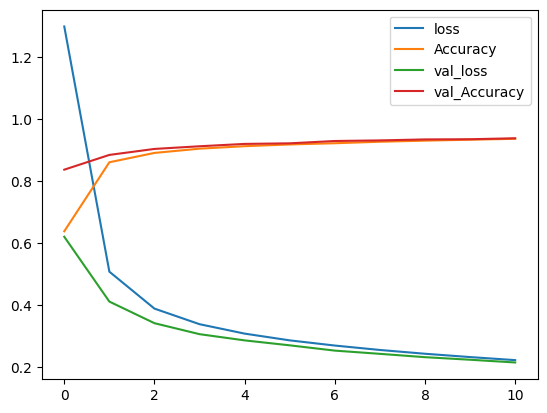

In [54]:
plt.figure()
plt.plot(np.arange(0, 11), h.history['loss'], label='loss')
plt.plot(np.arange(0, 11), h.history['Accuracy'], label='Accuracy')
plt.plot(np.arange(0, 11), h.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 11), h.history['val_Accuracy'], label='val_Accuracy')
plt.legend()